In [1]:
import os
import shutil

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
# Original Data Path
original_dataset_dir = './datasets/train'

# Small Dataset Path
base_dir = './datasets/cats_and_dogs_small'

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [3]:
# Train, Validation, Test data
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [5]:
# file copy

fnames = []
'''
for i in range(1000):
    filename = 'cat.{}.jpg'.format(i)
    fnames.append(filename)
print(fnames)
'''

# cat train data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# dog train data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
# cat validation data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# dog validation data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
# cat test data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# dog test data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
print('Train cat images: ', len(os.listdir(train_cats_dir)))
print('Train dog images: ', len(os.listdir(train_dogs_dir)))
print('Validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('Test cat images: ', len(os.listdir(test_cats_dir)))
print('Test dog images: ', len(os.listdir(test_dogs_dir)))

Train cat images:  1000
Train dog images:  1000
Validation cat images:  500
Validation dog images:  500
Test cat images:  500
Test dog images:  500


In [9]:
# Build network

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
from tensorflow.keras import optimizers

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
# Data Preprocessing

#Image Scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#ImageDataGenerator -> 텐서로 바꿔주는 역할
train_datagen = ImageDataGenerator(rescale = 1./255) # scale 1:1 비율로 맞추는 작업 (0~1사이로 리스케일)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size = 20, class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = (150,150), batch_size = 20, class_mode = 'binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
train_generator

In [13]:
for data_batch, labels_batch in train_generator:
    print('Batch Data Size: ', data_batch.shape)
    print('Batch Label Size: ', labels_batch.shape)
    break

Batch Data Size:  (20, 150, 150, 3)
Batch Label Size:  (20,)


In [14]:
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = validation_generator, validation_steps = 50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 82s 816ms/step - loss: 0.7735 - accuracy: 0.5120 - val_loss: 0.7044 - val_accuracy: 0.5010
Epoch 2/30
100/100 [==============================] - 67s 670ms/step - loss: 0.7019 - accuracy: 0.5430 - val_loss: 0.6645 - val_accuracy: 0.6100
Epoch 3/30
100/100 [==============================] - 67s 668ms/step - loss: 0.6909 - accuracy: 0.5945 - val_loss: 0.6377 - val_accuracy: 0.6510
Epoch 4/30
100/100 [==============================] - 67s 671ms/step - loss: 0.6520 - accuracy: 0.6410 - val_loss: 0.6808 - val_accuracy: 0.6280
Epoch 5/30
100/100 [==============================] - 67s 671ms/step - loss: 0.5749 - accuracy: 0.6970 - val_loss: 0.6391 - val_accuracy: 0.6350
Epoch 6/30
100/100 [==============================] - 67s 671ms/step - loss: 0.5452 - accuracy: 0.7225 - val_loss: 0.5970 - val_accuracy: 0.7050
Epoch 7/30
100/100 [==============================] - 

In [15]:
model.save('cats_and_dogs_small_1.0.h5')

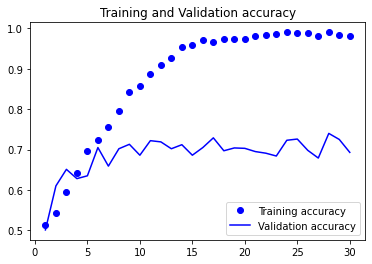

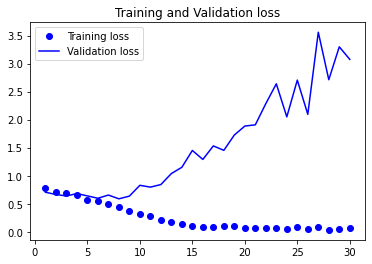

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b-', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [19]:
# 이미지 증식 (원본데이터의 값이 부족할 때 사용)
datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range=0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

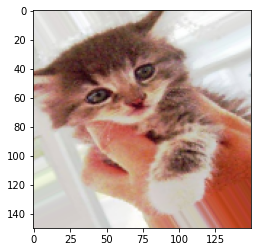

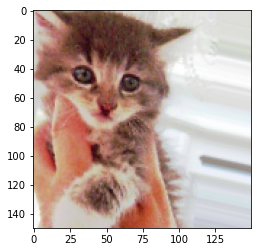

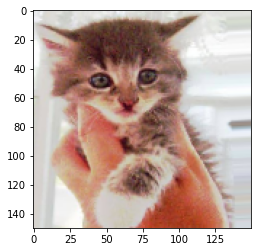

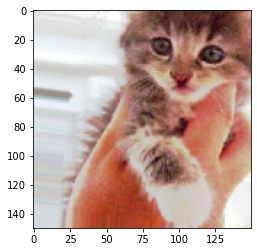

In [30]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2,  height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')
#검증 데이터는 증식되어서는 안된다!

test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size = 32, class_mode = 'binary')
# 모든 이미지를 150*150 크기로 바꾼다 / binary_crossentropy손실을 사용하기 떄문에 이진 레이블을 만들어야한다.
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size = 32, class_mode = 'binary')

history = model.fit_generator(train_generator, steps_per_epoch = 5, epochs = 100, validation_data = validation_generator, validation_steps = 50)